## Chapter 4
### Data Visualization

In [6]:
%matplotlib inline
from matplotlib import pylab as plt
plt.rcParams['figure.figsize'] = (15.0, 10.0)
import pandas as pd
import seaborn as sns

### 4.1 Introduction
#### Case Study: 2012 Major League Baseball Season

In [4]:
data = pd.read_csv("978-3-319-12065-2/chapter-4/teams.csv")
data.head()

,team,code,league,division,games,wins,losses,pct,payroll
0,Arizona Diamondbacks,ARI,NL,West,162,81,81,0.500,67069833
1,Atlanta Braves,ATL,NL,East,162,94,68,0.580,86208000
2,Baltimore Orioles,BAL,AL,East,162,93,69,0.574,76704000
3,Boston Red Sox,BOS,AL,East,162,69,93,0.426,110386000
4,Chicago Cubs,CHC,NL,Central,162,61,101,0.377,80422700


### 4.2 Basic Visualizations
#### 4.2.1 Scatterplots
#### Independent and Dependent Variables

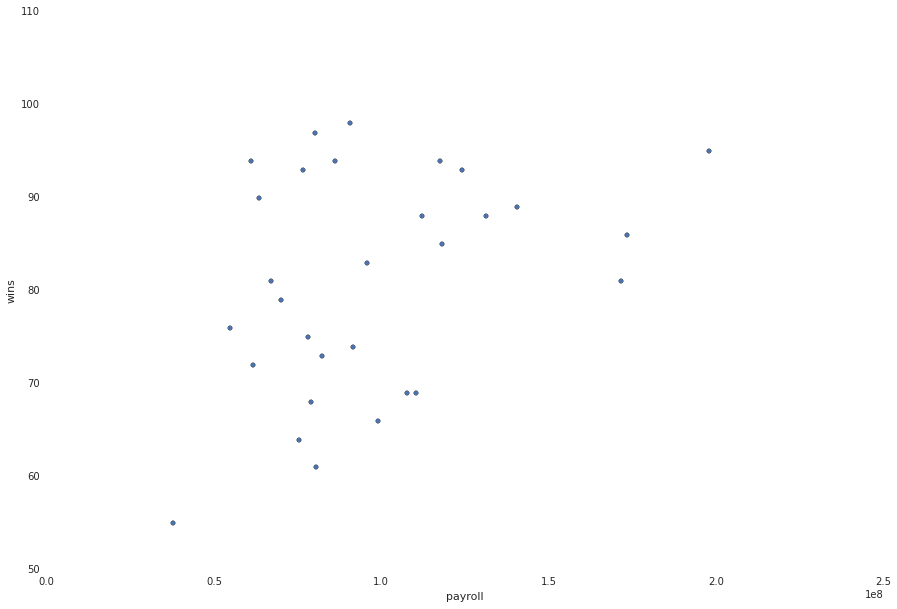

In [19]:
data.plot(kind='scatter',x="payroll",y="wins")

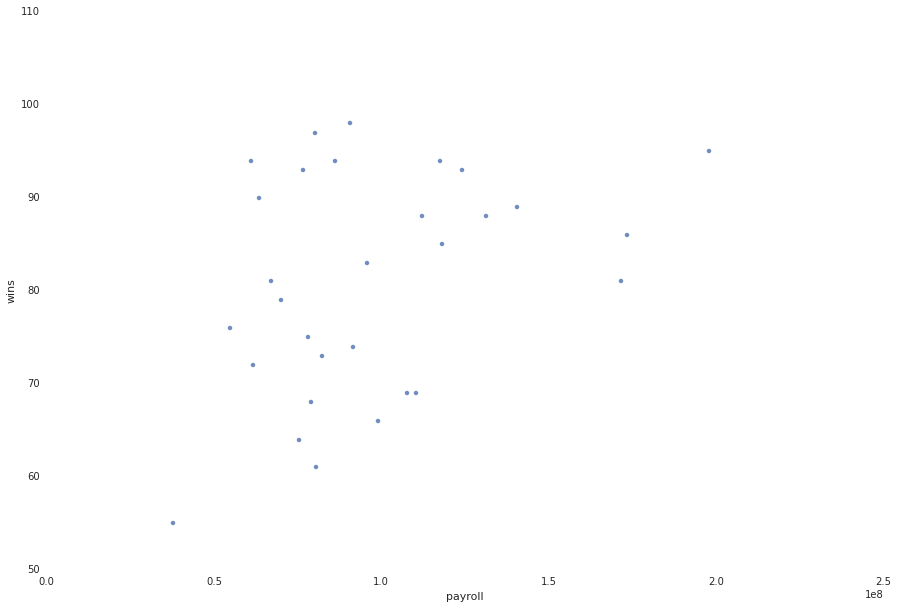

In [18]:
sns.regplot("payroll","wins",data,fit_reg=False)

#### 4.2.1.1 Labeling Data Points

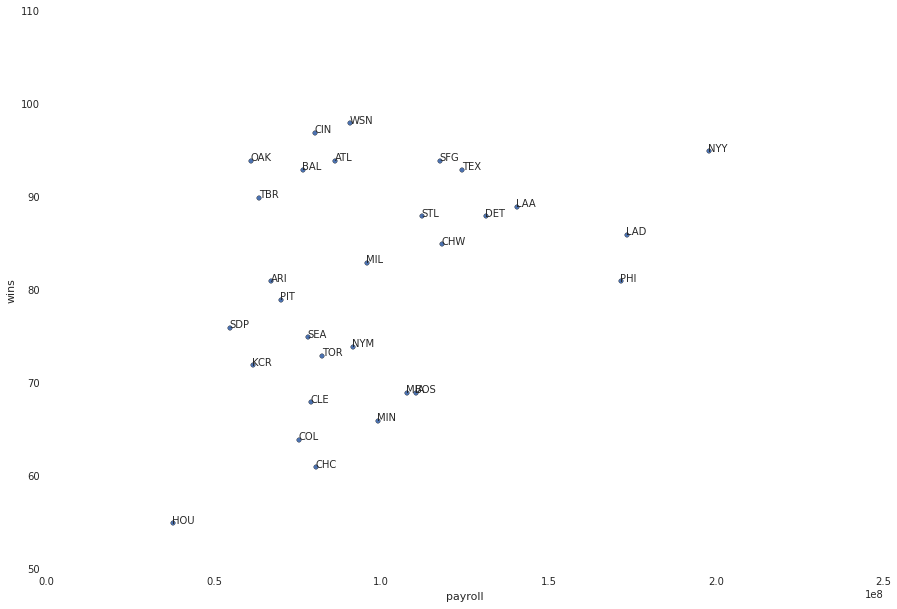

In [22]:
def label_point_orig(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

ax = data.plot(kind='scatter',x="payroll",y="wins")

label_point_orig(data.payroll,data.wins,data.code,ax)

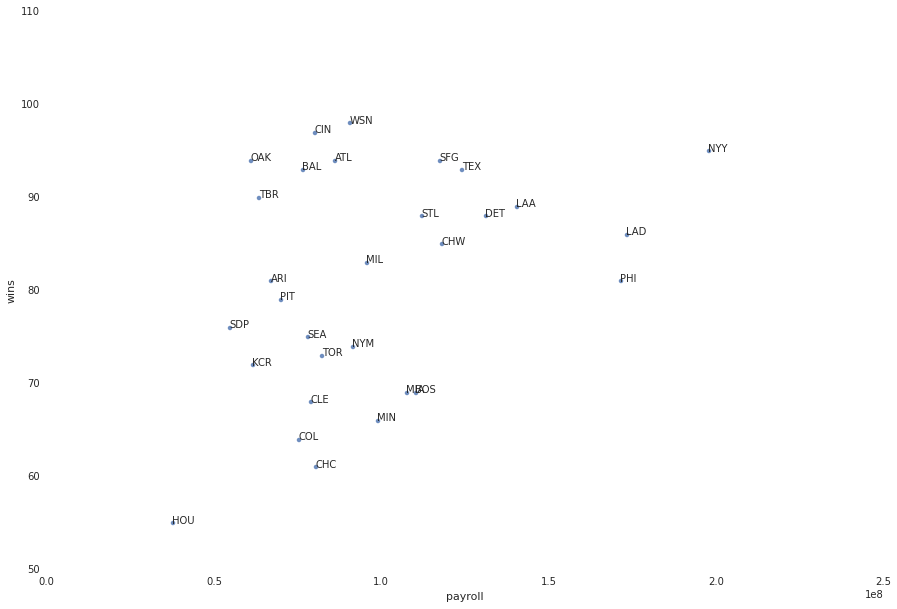

In [23]:
ax1 = sns.regplot("payroll","wins",data,fit_reg=False)
label_point_orig(data.payroll,data.wins,data.code,ax1)

#### 4.2.1.2 Points and Lines

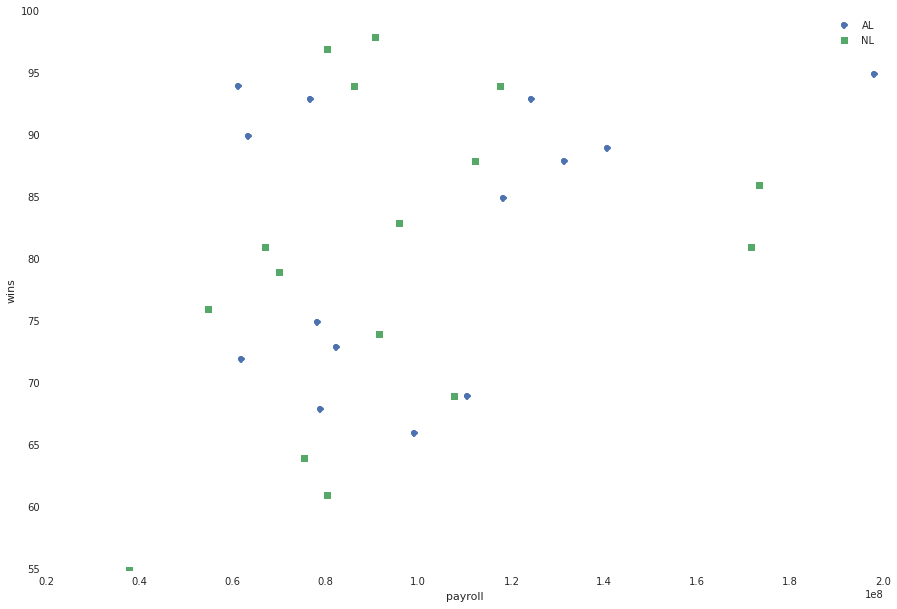

In [37]:
data_al = data[data.league == "AL"]
data_nl = data[data.league == "NL"]
fig, ax = plt.subplots()
ax.plot(data_al.payroll, data_al.wins, marker='o',linestyle='',label="AL")
ax.plot(data_nl.payroll, data_nl.wins, marker='s',linestyle='',label="NL")
ax.legend()
ax.set_xlabel("payroll")
ax.set_ylabel("wins")

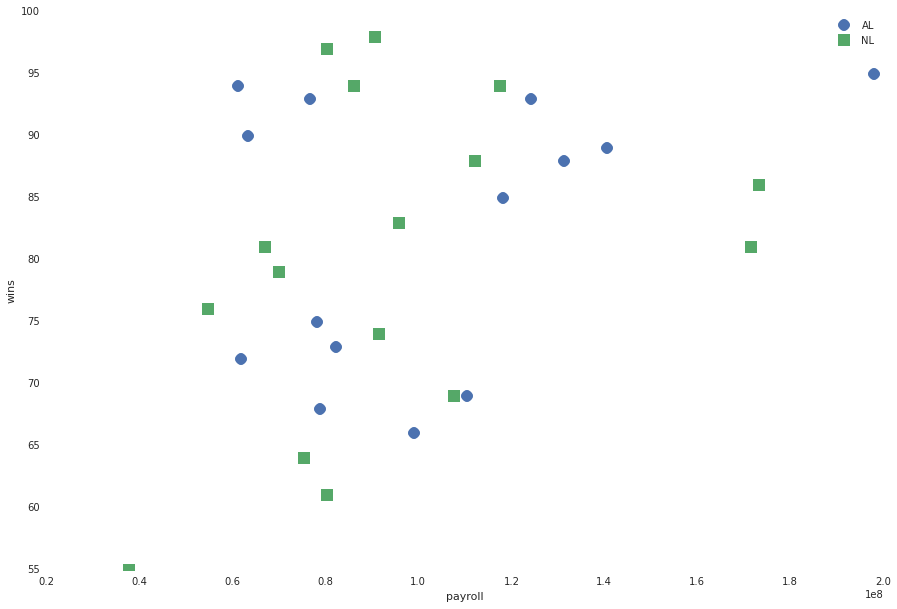

In [35]:
data_groups = data.groupby('league')
markers = ["o","s"]
mindx = 0

fig, ax = plt.subplots()
for name, group in data_groups:
    ax.plot(group.payroll, group.wins, marker=markers[mindx], linestyle='', ms=12, label=name)
    mindx += 1
ax.legend()
ax.set_xlabel("payroll")
ax.set_ylabel("wins")

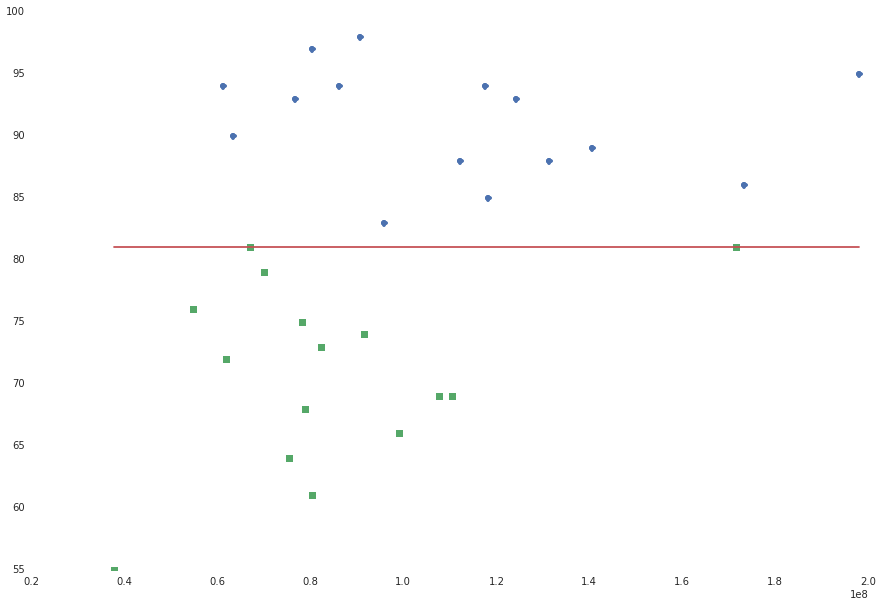

In [58]:
data_gf_al = data[data.pct >= 0.5 ]
data_gf_nl = data[data.pct <= 0.5]
fig, ax = plt.subplots()
ax.plot(data_gf_al.payroll,data_gf_al.wins,marker='o',linestyle='')
ax.plot(data_gf_nl.payroll,data_gf_nl.wins,marker='s',linestyle='')
ax.plot([data.payroll.min(),data.payroll.max()],[81,81])

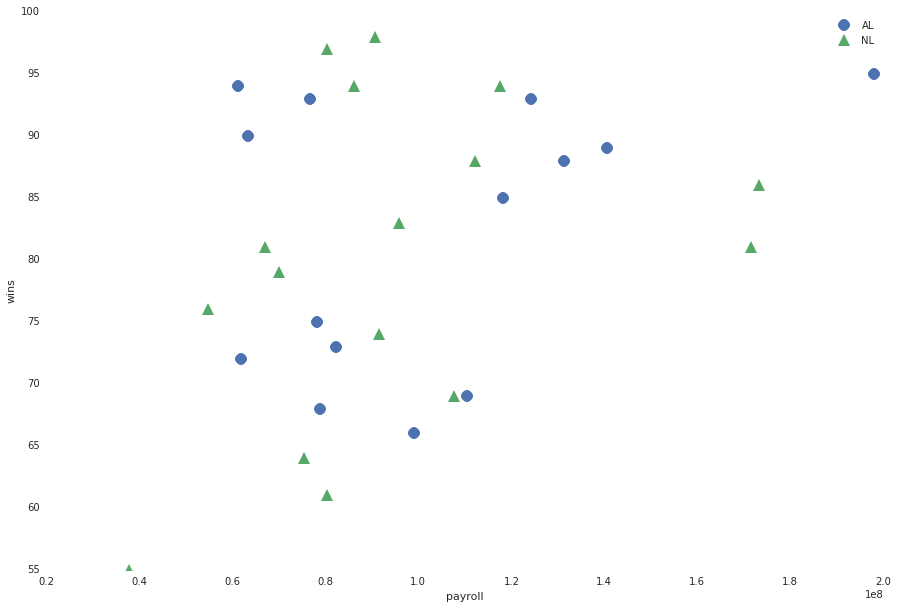

In [64]:
data_groups = data.groupby('league')
markers = ["o","^"]
mindx = 0

fig, ax = plt.subplots()
for name, group in data_groups:
    ax.plot(group.payroll, group.wins, marker=markers[mindx], linestyle='', ms=12, label=name)
    mindx += 1
ax.legend()
ax.set_xlabel("payroll")
ax.set_ylabel("wins")

### 4.2.2 Visualizing Aggregate Values with Bar plots and Pie charts
#### 4.2.2.1 Group Data by a Variable

In [65]:
data[data.league == "NL"].payroll.sum()

1512099665

In [66]:
data.groupby("league").payroll.sum()

league
AL    1424254675
NL    1512099665
Name: payroll, dtype: int64

In [68]:
data.groupby(["league","division"]).payroll.sum()

league  division
AL      Central     489326375
        East        530789300
        West        404139000
NL      Central     476248200
        East        547594982
        West        488256483
Name: payroll, dtype: int64

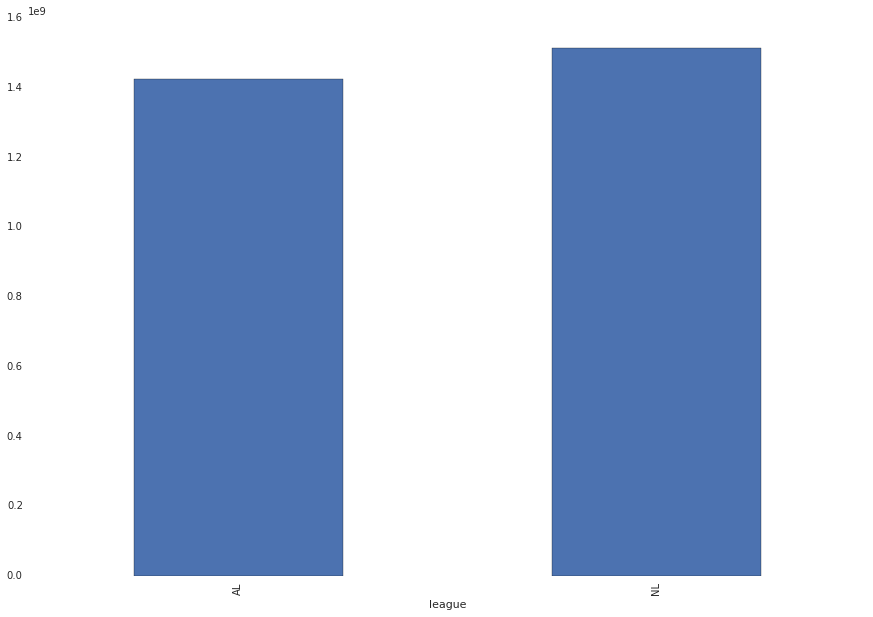

In [71]:
data.groupby("league").payroll.sum().plot(kind='bar')

### 4.2.2.2 Bar Plots

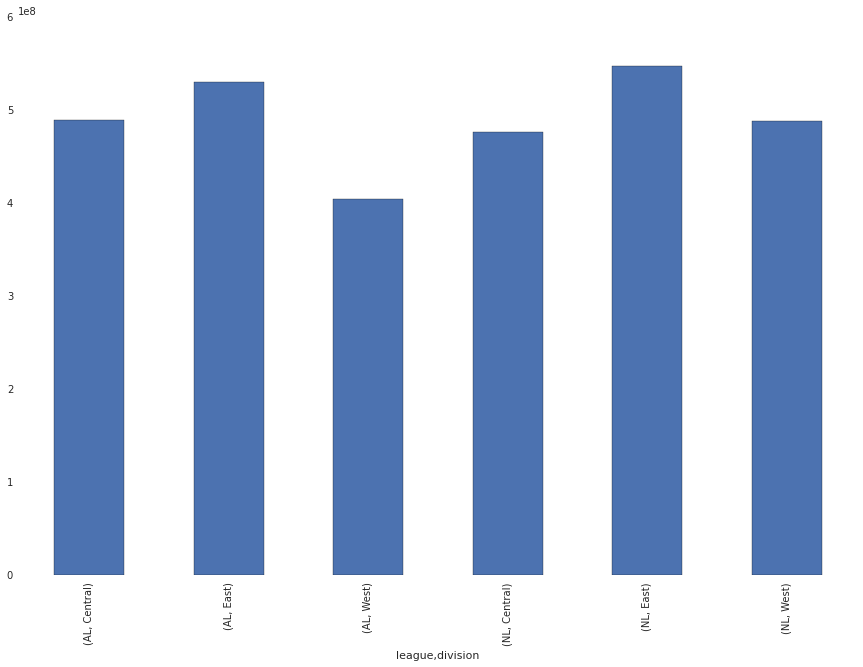

In [109]:
data.groupby(["league","division"]).payroll.sum().plot(kind='bar',stacked=True)

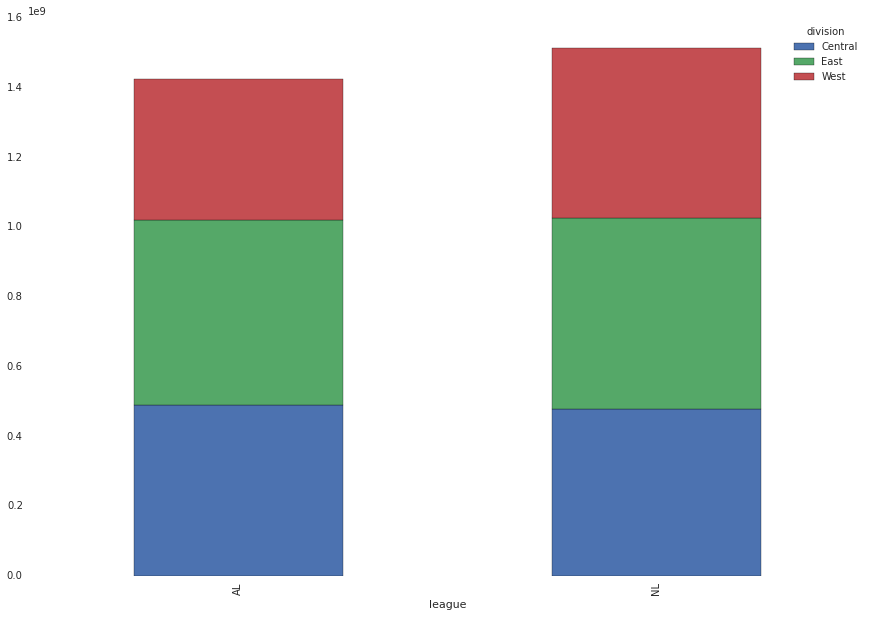

In [116]:
data.groupby(["league","division"]).payroll.sum().unstack("division").plot(kind='bar',stacked=True)

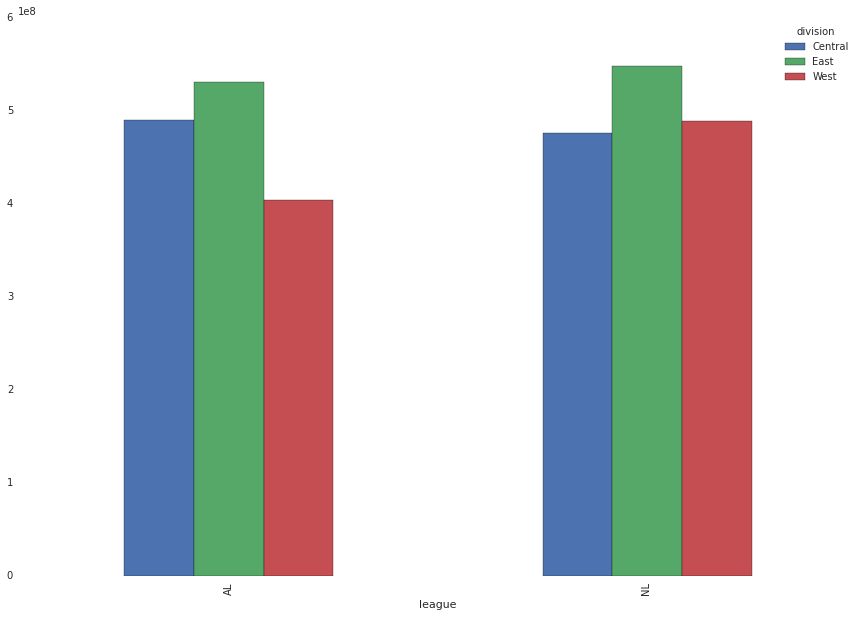

In [120]:
data.groupby(["league","division"]).payroll.sum().unstack("division").plot(kind='bar')

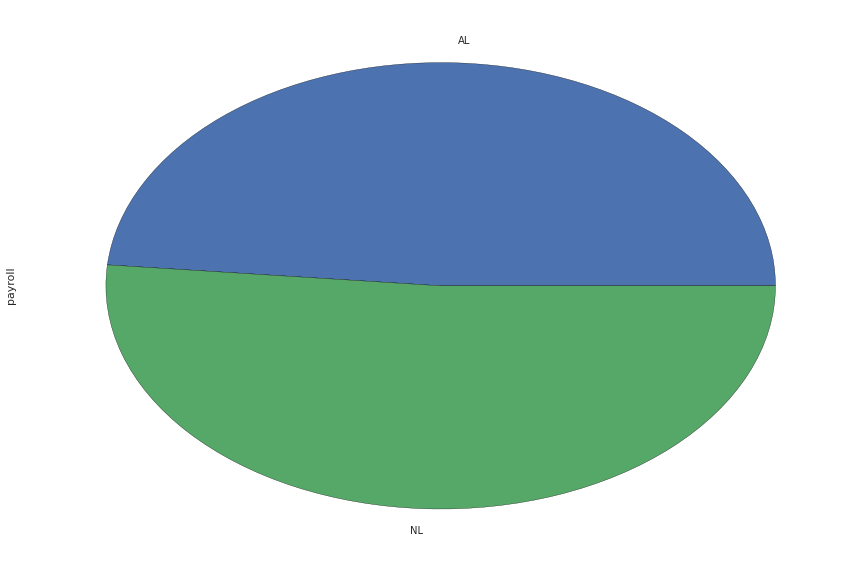

In [121]:
data.groupby(["league"]).payroll.sum().plot(kind='pie')

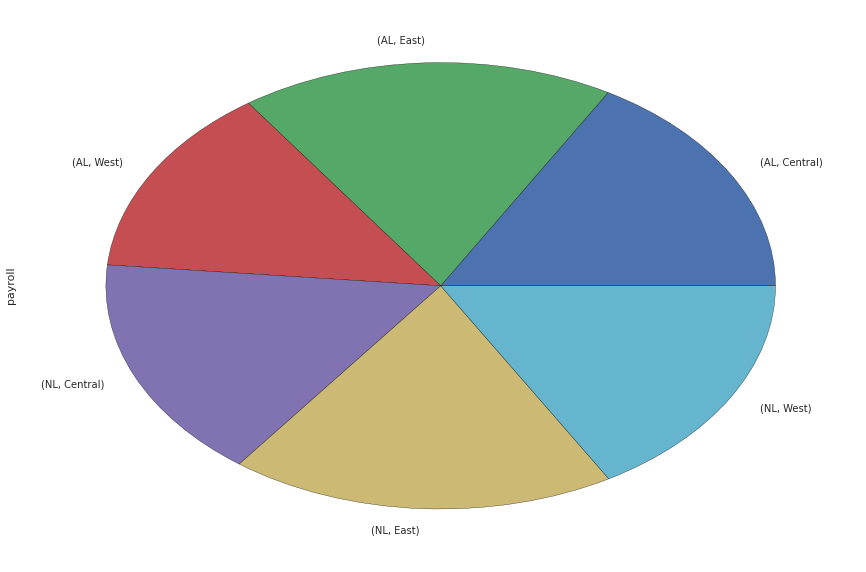

In [7]:
data.groupby(["league","division"]).payroll.sum().plot(kind='pie')

### 4.2.3 Common Plotting Tasks
#### 4.2.3.1 Multiple Plots


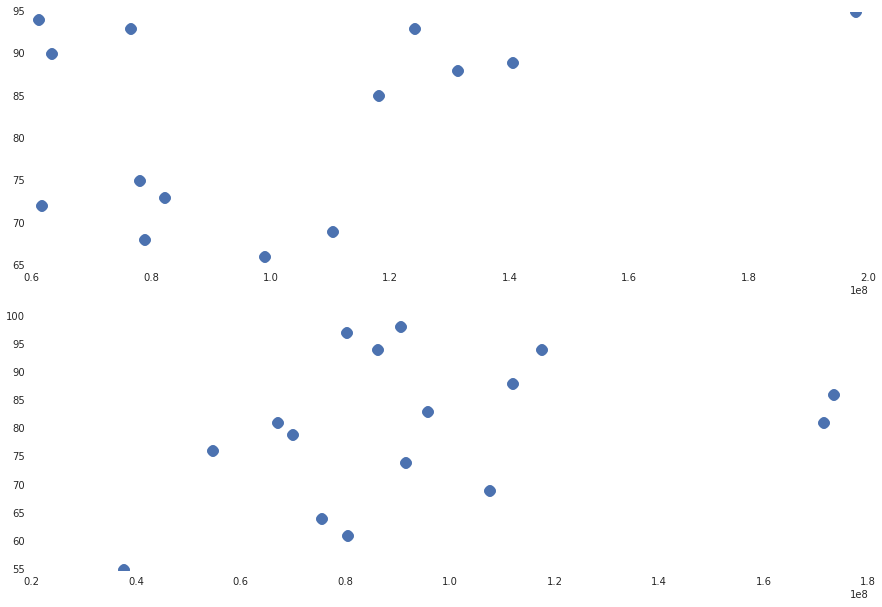

In [10]:
data_al = data[data.league == "AL"]
data_nl = data[data.league == "NL"]
fig, ax = plt.subplots(2)
ax[0].plot(data_al.payroll, data_al.wins, marker='o', linestyle='', ms=12, label="AL")
ax[1].plot(data_nl.payroll, data_nl.wins, marker='o', linestyle='', ms=12, label="NL")

#### 4.4 Interactive Visualizations Using Bokeh

In [21]:
from bokeh.sampledata.iris import flowers
from bokeh.plotting import figure, show, output_file,output_notebook

output_notebook()
colormap = {'AL': 'red', 'NL': 'green'}
data['color'] = data['league'].map(lambda x: colormap[x])
p = figure(title = "Payroll vs Wins")
p.xaxis.axis_label = 'Wins'
p.yaxis.axis_label = 'Payroll'
p.circle(data.payroll,data.wins,color=data["color"],size=10)
show(p)

#### Note
The ggplot and qplot examples are omitted from this to avoid repetitions.